 # **navie bayes**

For understnanding Multinomial and Bermouli NavieBayes ,we will take a few sentences and classify them into 2 different classes.

each sentence will represent one document. ex: mail,news article , tweet.

the analysis and mathmatics involved doesn't depend on the type of document we use.

therefore we have chosen a set of small sentences to demonstrate the calculation involved and to drive in the concept.

let us first look at the sentences and their classes.

In [22]:
import pandas as pd
import numpy as np
import sklearn

In [23]:
docs = pd.read_csv("/home/ramchowdary/Desktop/[FreeTutorials.Eu] Udemy - Machine Learning A-Z  Become Kaggle Master/16. Naive Bayes/1.1 NaiveBayes.zip/NaiveBayes/example_train1.csv")

In [24]:
docs

,Document,Class
0,Teclov is a great educational institution.,education
1,Educational greatness depends on ethics,education
2,A story of great ethics and educational greatness,education
3,Sholey is a great cinema,cinema
4,good movie depends on good story,cinema


In [25]:
docs['Class']= docs.Class.map({'education':1,'cinema':0})

In [26]:
docs

,Document,Class
0,Teclov is a great educational institution.,1
1,Educational greatness depends on ethics,1
2,A story of great ethics and educational greatness,1
3,Sholey is a great cinema,0
4,good movie depends on good story,0


In [27]:
numpy_array = docs.as_matrix()
x = numpy_array[:,0]
y = numpy_array[:,1]
y = y.astype('int')
print("x")
print(x)
print('y')
print(y)


x
['Teclov is a great educational institution.'
 'Educational greatness depends on ethics'
 'A story of great ethics and educational greatness'
 'Sholey is a great cinema' 'good movie depends on good story']
y
[1 1 1 0 0]


/home/ramchowdary/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


numpt_array = docs.as_matrix()
x = numpy_array[:,0]
y = numpy_array[:,1]
y = y.astype('int')
print('x')
print(x)
print("y")
print(y)

Imagine breaking X in individual words and putting them all in a bag. Then we pick all the unique words from the bag one by one and make a dictionary of unique words.

This is called vectorization of words. We have the class CountVectorizer() in scikit learn to vectorize the words. Let us first see it in action before explaining it further.


In [29]:
# create an objet of count Vectorizer() class
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()

here vec is an object of class CountVectorizer()

this has an method called fit()

which converts a corpus of documents into a vector of unique words.

In [31]:
vec.fit(x)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [32]:
vec.vocabulary_

{'teclov': 15,
 'is': 9,
 'great': 6,
 'educational': 3,
 'institution': 8,
 'greatness': 7,
 'depends': 2,
 'on': 12,
 'ethics': 4,
 'story': 14,
 'of': 11,
 'and': 0,
 'sholey': 13,
 'cinema': 1,
 'good': 5,
 'movie': 10}

In [33]:
vec.fit(x)
vec.vocabulary_

{'teclov': 15,
 'is': 9,
 'great': 6,
 'educational': 3,
 'institution': 8,
 'greatness': 7,
 'depends': 2,
 'on': 12,
 'ethics': 4,
 'story': 14,
 'of': 11,
 'and': 0,
 'sholey': 13,
 'cinema': 1,
 'good': 5,
 'movie': 10}

In [35]:
# 2
print(vec.get_feature_names())
print(len(vec.get_feature_names()))

['and', 'cinema', 'depends', 'educational', 'ethics', 'good', 'great', 'greatness', 'institution', 'is', 'movie', 'of', 'on', 'sholey', 'story', 'teclov']
16


Countvectorizer() has converted the documents into a set of unique words alphabetically sorted and indexed.

Stop Words

We can see a few trivial words such as 'and','is','of', etc. These words don't really make any difference in classyfying a document. These are called 'stop words'. So we would like to get rid of them.

We can remove them by passing a parameter stop_words='english' while instantiating Countvectorizer() as follows:


In [39]:
vec=CountVectorizer(stop_words = "english")
vec.fit(x)
vec.vocabulary_

{'teclov': 11,
 'great': 5,
 'educational': 2,
 'institution': 7,
 'greatness': 6,
 'depends': 1,
 'ethics': 3,
 'story': 10,
 'sholey': 9,
 'cinema': 0,
 'good': 4,
 'movie': 8}

In [40]:
# printing feature names
print(vec.get_feature_names())
print(len(vec.get_feature_names()))

['cinema', 'depends', 'educational', 'ethics', 'good', 'great', 'greatness', 'institution', 'movie', 'sholey', 'story', 'teclov']
12


So our final dictionary is made of 12 words (after discarding the stop words). Now, to do classification, we need to represent all the documents with respect to these words in the form of features.

Every document will be converted into a feature vector representing presence of these words in that document. Let's convert each of our training documents in to a feature vector.


In [43]:
# another way of representing the features
x_transform = vec.transform(x)
x_transform


<5x12 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

You can see X_tranformed is a 5 x 12 sparse matrix. It has 5 rows for each of our 5 documents and 12 columns each for one word of the dictionary which we just created. Let us print X_transformed.

sparse matrix  contains a large number of zero-valued elements can both save a significant amount of memory and speed up the processing of that data.
* sparse matrix contains the  most of the elements are zero

In [44]:
print(x_transform)

  (0, 2)	1
  (0, 5)	1
  (0, 7)	1
  (0, 11)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	1
  (1, 6)	1
  (2, 2)	1
  (2, 3)	1
  (2, 5)	1
  (2, 6)	1
  (2, 10)	1
  (3, 0)	1
  (3, 5)	1
  (3, 9)	1
  (4, 1)	1
  (4, 4)	2
  (4, 8)	1
  (4, 10)	1


this representation can be understood as follows:

Consider first 4 rows of the output: (0,2), (0,5), (0,7) and (0,11). It says that the first document (index 0) has 7th , 2nd , 5th and 11th 'word' present in the document, and that they appear only once in the document- indicated by the right hand column entry.

Similarly, consider the entry (4,4) (third from bottom). It says that the fifth document has the fifth word present twice. Indeed, the 5th word('good') appears twice in the 5th document.

In real problems, you often work with large documents and vocabularies, and each document contains only a few words in the vocabulary. So it would be a waste of space to store the vocabulary in a typical dataframe, since most entries would be zero. Also, matrix products, additions etc. are much faster with sparse matrices. That's why we use sparse matrices to store the data.

Let us convert this sparse matrix into a more easily interpretable array:

In [46]:
x = x_transform.toarray()
x

array([[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0]])

to make better sense of the dataset, let us examine the vocabulary and document-term matrix together in a pandas dataframe. The way to convert a matrix into a dataframe is pd.DataFrame(matrix, columns=columns).

In [51]:
# converting matrix into dataframe
li = pd.DataFrame(x,columns=vec.get_feature_names())

This table shows how many times a particular word occurs in document. In other words, this is a frequency table of the words.

In [52]:
li

,cinema,depends,educational,ethics,good,great,greatness,institution,movie,sholey,story,teclov
0,0,0,1,0,0,1,0,1,0,0,0,1
1,0,1,1,1,0,0,1,0,0,0,0,0
2,0,0,1,1,0,1,1,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,1,0,0
4,0,1,0,0,2,0,0,0,1,0,1,0


A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the "Bag of Words" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.


So, the 4 steps for vectorization are as follows

    Import
    Instantiate
    Fit
    Transform



Let us summarise all we have done till now:

    vect.fit(train) learns the vocabulary of the training data
    vect.transform(train) uses the fitted vocabulary to build a document-term matrix from the training data
    vect.transform(test) uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

In [75]:
document=['good at study']
Class = ['education']

In [76]:
z = list(zip(document,Class))

In [77]:
df =pd.DataFrame(data = z,columns=['document','Class'])

In [78]:
df

,document,Class
0,good at study,education


In [79]:
type(df)

pandas.core.frame.DataFrame

In [80]:
# convert label to a numerical variable
df['Class']=df.Class.map({'education':'1'})

In [81]:
df

,document,Class
0,good at study,1


In [85]:
test_numpy_array = df.as_matrix()
x_test = test_numpy_array[:,0]
y_test = test_numpy_array[:,1]
y_test = y_test.astype('int')
print('x_test')
print(x_test)
print("y_test")
print(y_test)

x_test
['good at study']
y_test
[1]


/home/ramchowdary/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [86]:
x_test_transformed = vec.transform(x_test)
x_test_transformed

<1x12 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [87]:
x_test = x_test_transformed.toarray()
x_test

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [88]:
# MULTI NOMIAL

In [90]:
from sklearn.naive_bayes import MultinomialNB # building a multinomal NB model
mnb = MultinomialNB() # instatiate NB class
mnb.fit(x,y) # fitting the model on training data
mnb.predict_proba(x_test) # predicting the probabilities of test data

array([[0.71428571, 0.28571429]])

In [91]:
proba = mnb.predict_proba(x_test)
print("probability of test document belonging to class CINEMA " ,proba[:,0])
print("probability of test document belonging to class EDUCATION",proba[:,1])


probability of test document belonging to class CINEMA  [0.71428571]
probability of test document belonging to class EDUCATION [0.28571429]


In [92]:
pd.DataFrame(proba,columns=['Cinema',"Education"])

,Cinema,Education
0,0.714286,0.285714


# * ** EMAIL SPAM ** *

In [110]:
import numpy as np
import pandas as pd
import sklearn

In [111]:
sm= pd.read_table('/home/ramchowdary/Desktop/[FreeTutorials.Eu] Udemy - Machine Learning A-Z  Become Kaggle Master/16. Naive Bayes/1.1 NaiveBayes.zip/NaiveBayes/SMSSpamCollection+(1)',header = None,names = ['class','sms'])

In [112]:
sm.describe()

,class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [113]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
class    5572 non-null object
sms      5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [114]:
sm.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [115]:
h = sm["class"].value_counts()


In [116]:
h # ham=0,spam =1

ham     4825
spam     747
Name: class, dtype: int64

In [117]:
# counting spam and Ham instances
# df.column_name.value_counts()-given no.of unique inputs in the columns

In [118]:
print("ham % is ",(h[0]/float(h[0]+h[1]))*100)

ham % is  86.59368269921033


In [119]:
print('spam % is',(h[1]/float(h[0]+h[1]))*100)

spam % is 13.406317300789663


In [120]:
sm['label'] = sm["class"]

In [121]:
sm["label"].loc[sm["label"]=="spam"]=1

In [122]:
sm["label"].loc[sm["label"]=="ham"]=0

In [124]:
sm.head()

,class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [131]:
sm['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [132]:
sm['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [133]:
x = sm.sms
y = sm.label

In [135]:
print(x.shape)

(5572,)


In [136]:
print(y.shape)

(5572,)


In [138]:
# splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =11)


In [139]:
x_train.head()

1426            I'll be at mu in like  &lt;#&gt;  seconds
1247    I do know what u mean,  is the king of not hav...
4286                         I pocked you up there before
862                              Your brother is a genius
3604    I'm not sure, I was just checking out what was...
Name: sms, dtype: object

In [140]:
# vectorizing the sentences  , removing stop words

In [143]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words= 'english')

In [144]:
vect.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [145]:
vect.vocabulary_

{'ll': 3927,
 'mu': 4368,
 'like': 3879,
 'lt': 4013,
 'gt': 3078,
 'seconds': 5630,
 'know': 3736,
 'mean': 4158,
 'king': 3719,
 'havin': 3179,
 'credit': 1985,
 'goin2bed': 2993,
 'night': 4503,
 'sweet': 6271,
 'only1more': 4652,
 'sleep': 5856,
 'pocked': 4950,
 'brother': 1465,
 'genius': 2931,
 'sure': 6245,
 'just': 3654,
 'checking': 1683,
 'happening': 3148,
 'area': 1015,
 'sale': 5538,
 'arsenal': 1040,
 'dartboard': 2073,
 'good': 3007,
 'condition': 1871,
 'doubles': 2301,
 'trebles': 6613,
 'watever': 6955,
 'relation': 5339,
 'built': 1492,
 'dis': 2225,
 'world': 7123,
 'thing': 6447,
 'remains': 5349,
 'atlast': 1076,
 'iz': 3557,
 'lonlines': 3959,
 'lotz': 3983,
 'lot': 3978,
 'memories': 4190,
 'feeling': 2649,
 'hotel': 3314,
 'dusk': 2366,
 'game': 2890,
 'think': 6449,
 'solve': 5930,
 'puzzles': 5182,
 'weather': 6976,
 'cali': 1538,
 'great': 3055,
 'complexities': 1859,
 'need': 4458,
 'car': 1580,
 'freely': 2819,
 'taxes': 6339,
 'outrageous': 4711,
 'place

In [148]:
print(vect.get_feature_names())
print(len(vect.get_feature_names()))

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07090201529', '07099833605', '07123456789', '0721072', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '07801543489', '07808', '07808247860', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '08700469649', '08700621170150p', '08701213186', '08701237397', '08701417012', '08701417012150p', '08701417

In [149]:
# transforming the train and test data sets
x_train_transformed = vect.transform(x_train)
x_test_transformed = vect.transform(x_test)

In [150]:
# note that the type is transformed matrix
print(type(x_train_transformed))
print(x_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 3078)	1
  (0, 3879)	1
  (0, 3927)	1
  (0, 4013)	1
  (0, 4368)	1
  (0, 5630)	1
  (1, 1985)	1
  (1, 2993)	1
  (1, 3179)	1
  (1, 3719)	1
  (1, 3736)	1
  (1, 4158)	1
  (1, 4503)	2
  (1, 4652)	1
  (1, 5856)	1
  (1, 6271)	1
  (2, 4950)	1
  (3, 1465)	1
  (3, 2931)	1
  (4, 1015)	1
  (4, 1683)	1
  (4, 3148)	1
  (4, 3654)	1
  (4, 6245)	1
  (5, 1040)	1
  :	:
  (4176, 675)	2
  (4176, 684)	1
  (4176, 771)	2
  (4176, 2218)	1
  (4176, 2718)	1
  (4176, 2940)	1
  (4176, 3894)	1
  (4176, 4243)	1
  (4176, 4573)	1
  (4176, 4822)	1
  (4176, 5057)	1
  (4176, 6369)	1
  (4176, 6695)	1
  (4176, 7162)	1
  (4177, 1153)	1
  (4177, 4628)	1
  (4178, 924)	1
  (4178, 1953)	1
  (4178, 3736)	1
  (4178, 3830)	1
  (4178, 3854)	1
  (4178, 3927)	1
  (4178, 4244)	1
  (4178, 4368)	1
  (4178, 7199)	1


In [151]:
# training the mnb and making predictions

In [153]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [154]:
# fitting the training data
mnb.fit(x_train_transformed,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [155]:
# predict class
y_pred_class = mnb.predict(x_test_transformed)

In [156]:
# predict probabilities
y_pred_proba = mnb.predict_proba(x_test_transformed)

In [158]:
import matplotlib.pyplot as plt

In [159]:
# printing the overall accuracies

In [160]:
from sklearn import metrics

In [161]:
metrics.accuracy_score(y_test,y_pred_class)

0.9827709978463748

In [162]:
y_pred_class

array([1, 0, 0, ..., 0, 0, 0])

In [163]:
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [166]:
# confusion matrix
k = metrics.confusion_matrix(y_test,y_pred_class)

In [167]:
k

array([[1208,    8],
       [  16,  161]])

In [168]:
confusion = k
print(confusion) # [row,column]

[[1208    8]
 [  16  161]]


In [169]:
TN = confusion[0,0] # true negative
FP = confusion[0,1] # false positive
FN = confusion[1,0]
TP = confusion[1,1]

In [170]:
# sensitivity = TP / FN + TP

sensitivity = TP/float(TP+FP)

In [171]:
print("sensitivity : ",sensitivity)

sensitivity :  0.9526627218934911


In [172]:
# specificity = TP/ TN+FP
specificity  = TP/float(FN+FP)


In [173]:
print("specificity is : ",specificity)

specificity is :  6.708333333333333


In [174]:
precision = TP/float(TP+FP)

In [175]:
print("precision is : ",precision)

precision is :  0.9526627218934911


In [176]:
print(metrics.precision_score(y_test,y_pred_class))

0.9526627218934911


In [177]:
print(metrics.recall_score(y_test,y_pred_class))

0.9096045197740112


In [178]:
print(metrics.f1_score(y_test,y_pred_class))

0.9306358381502889


In [179]:
y_pred_class

array([1, 0, 0, ..., 0, 0, 0])

In [180]:
y_pred_proba

array([[7.73178576e-10, 9.99999999e-01],
       [9.99997247e-01, 2.75276119e-06],
       [9.99990879e-01, 9.12147591e-06],
       ...,
       [9.86349975e-01, 1.36500248e-02],
       [9.99999993e-01, 6.59980242e-09],
       [9.98618475e-01, 1.38152521e-03]])

#  *** creating an ROC curve ***

In [181]:
from sklearn.metrics import confusion_matrix as scm

In [188]:
#from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_curve, auc

In [189]:
false_positiverate , true_positive_rate,thresholds = roc_curve(y_test,y_pred_proba[:,1])


In [192]:
roc_auc  = auc(false_positiverate , true_positive_rate)

In [191]:
roc_auc = auc(false_positive_rate, true_positive_rate)

NameError: name 'false_positive_rate' is not defined

In [193]:
print(roc_auc)

0.98088341882248


In [194]:
print(true_positive_rate)

[0.         0.24293785 0.27683616 0.28248588 0.30508475 0.33333333
 0.43502825 0.44632768 0.47457627 0.48587571 0.55367232 0.56497175
 0.81920904 0.84180791 0.87570621 0.87570621 0.88700565 0.88700565
 0.89830508 0.89830508 0.9039548  0.9039548  0.90960452 0.90960452
 0.90960452 0.92090395 0.92090395 0.92655367 0.92655367 0.93220339
 0.93220339 0.93785311 0.93785311 0.93785311 0.94350282 0.94350282
 0.94915254 0.94915254 0.94915254 0.94915254 0.94915254 0.94915254
 0.94915254 0.94915254 0.94915254 0.94915254 0.94915254 0.94915254
 0.94915254 0.94915254 0.94915254 0.94915254 0.95480226 0.95480226
 0.95480226 0.95480226 0.95480226 0.95480226 0.95480226 0.95480226
 0.95480226 0.95480226 0.95480226 0.95480226 0.95480226 0.95480226
 0.95480226 0.95480226 0.95480226 0.95480226 0.95480226 0.95480226
 0.95480226 0.95480226 0.95480226 0.95480226 0.95480226 0.96045198
 0.96045198 0.96045198 0.96045198 0.96045198 0.96045198 0.96610169
 0.96610169 0.96610169 0.96610169 0.96610169 0.96610169 0.9661

In [195]:
print(false_positiverate)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.22368421e-04
 8.22368421e-04 1.64473684e-03 1.64473684e-03 3.28947368e-03
 3.28947368e-03 4.93421053e-03 4.93421053e-03 6.57894737e-03
 9.04605263e-03 9.04605263e-03 9.86842105e-03 9.86842105e-03
 1.23355263e-02 1.23355263e-02 2.13815789e-02 3.37171053e-02
 3.86513158e-02 3.94736842e-02 3.94736842e-02 4.68750000e-02
 4.68750000e-02 4.85197368e-02 5.01644737e-02 5.26315789e-02
 5.42763158e-02 5.92105263e-02 6.08552632e-02 6.49671053e-02
 6.66118421e-02 6.74342105e-02 6.90789474e-02 7.23684211e-02
 7.56578947e-02 8.22368421e-02 8.47039474e-02 9.78618421e-02
 9.78618421e-02 1.00328947e-01 1.01973684e-01 1.03618421e-01
 1.05263158e-01 1.11842105e-01 1.14309211e-01 1.25000000e-01
 1.26644737e-01 1.27467105e-01 1.29111842e-01 1.32401316e-01
 1.34046053e-01 1.356907

In [199]:
print(thresholds)

[2.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 9.99999999e-01 9.99999996e-01
 9.99440079e-01 9.97974176e-01 9.42819484e-01 9.31975275e-01
 9.12284704e-01 8.62209246e-01 7.62478611e-01 6.97653083e-01
 6.91041520e-01 5.37857704e-01 5.37598111e-01 5.10099212e-01
 4.16436332e-01 3.61923721e-01 3.54464971e-01 3.44562928e-01
 3.15042335e-01 3.04823728e-01 1.37869126e-01 1.36396267e-01
 1.35833723e-01 1.35273136e-01 1.34962189e-01 1.11227734e-01
 1.02748055e-01 1.01529858e-01 9.67771386e-02 9.48504452e-02
 9.44405122e-02 8.40974324e-02 8.24199078e-02 7.28656692e-02
 7.25431369e-02 7.21261471e-02 6.69771758e-02 6.18747407e-02
 5.91546033e-02 5.10295864e-02 4.97863514e-02 3.98618440e-02
 3.80094328e-02 3.60863460e-02 3.55013842e-02 3.40945748e-02
 3.37510142e-02 3.00143558e-02 2.89348783e-02 2.59177559e-02
 2.55286652e-02 2.54099226e-02 2.54099226e-02 2.36112883e-02
 2.35779128e-02 2.336623

In [202]:
# matrix of thresholds , tpr ,fpr
pd.DataFrame({'threshold': thresholds,
               'TPR' : true_positive_rate,
               'FPR' : false_positiverate
             })

,threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.242938,0.000000
2,1.000000e+00,0.276836,0.000000
3,1.000000e+00,0.282486,0.000000
4,1.000000e+00,0.305085,0.000000
5,1.000000e+00,0.333333,0.000000
6,1.000000e+00,0.435028,0.000000
7,1.000000e+00,0.446328,0.000000
8,1.000000e+00,0.474576,0.000000
9,1.000000e+00,0.485876,0.000000


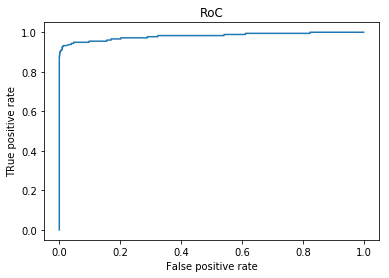

In [205]:
plt.ylabel('TRue positive rate')
plt.xlabel('False positive rate')
plt.title('RoC')
plt.plot(false_positiverate , true_positive_rate)
plt.show()

# * ** LOGISTIC REGRESSION ** *

In [1]:
# importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# importing all data sets
churn_data = pd.read_csv("/home/ramchowdary/Desktop/[FreeTutorials.Eu] Udemy - Machine Learning A-Z  Become Kaggle Master/17. Logistic Regression/1.1 LogisticReg.zip/LogisticReg/churn_data.csv")
customer_data = pd.read_csv('/home/ramchowdary/Desktop/[FreeTutorials.Eu] Udemy - Machine Learning A-Z  Become Kaggle Master/17. Logistic Regression/1.1 LogisticReg.zip/LogisticReg/customer_data.csv')
internet_data = pd.read_csv("/home/ramchowdary/Desktop/[FreeTutorials.Eu] Udemy - Machine Learning A-Z  Become Kaggle Master/17. Logistic Regression/1.1 LogisticReg.zip/LogisticReg/internet_data.csv")

In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [5]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: object(9)
memory usage: 495.3+ KB


In [6]:
# merging on customer id
df1 = pd.merge(churn_data,customer_data , how = 'inner',on='customerID')

In [7]:
# Final dataframe with all predictor values
df2 = pd.merge(df1,internet_data,how = "inner",on='customerID')

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [9]:
df2.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [10]:
df2.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
df2['PhoneService']=df2['PhoneService'].map({'Yes': 1,'No':0})
df2['PaperlessBilling']=df2['PaperlessBilling'].map({'Yes': 1,'No':0})
df2['Churn'] = df2['Churn'].map({'Yes':1,'N0':0})
df2['Partner'] = df2['Partner'].map({'Yes':1,'No':0})
df2['Dependents']= df2["Dependents"].map({'Yes':1,'No':0})

In [12]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               1869 non-null float64
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(2), int64(6), object

In [13]:
df2["Churn"].fillna(df2["Churn"].mean(),inplace=True)

In [14]:
a=df2.corr()

In [15]:
import seaborn as sbn

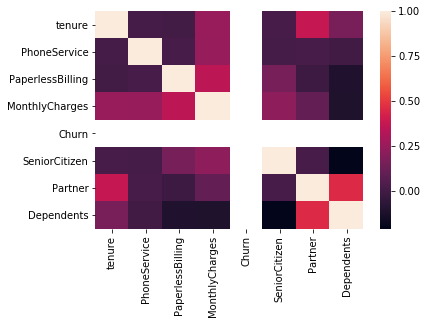

In [16]:
sbn.heatmap(a)

In [17]:
a=pd.get_dummies(df2["gender"],drop_first=True)

# LINEAR SVM

In [18]:
we will build a  linear SVM classifier to classify emails into spam and ham.

SyntaxError: invalid syntax (<ipython-input-18-2090e30cf1fe>, line 1)

In [19]:
# import the libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# load the data

In [21]:
email = pd.read_csv('/home/ramchowdary/Desktop/[FreeTutorials.Eu] Udemy - Machine Learning A-Z  Become Kaggle Master/18. Support Vector Machine (SVM)/1.1 SVM.zip/SVM/Spam.txt',sep = ',',header = None)

In [22]:
email.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [23]:
# emil.info()

In [24]:
# renaming the columns
email.columns  = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]

In [25]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [26]:
email.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [27]:
email.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [28]:
email.shape

(4601, 58)

In [29]:
# there are no missing values in the Dataset
email.sum()

word_freq_make                    481.050
word_freq_address                 980.080
word_freq_all                    1291.300
word_freq_3d                      301.020
word_freq_our                    1436.540
word_freq_over                    441.240
word_freq_remove                  525.470
word_freq_internet                484.460
word_freq_order                   414.400
word_freq_mail                   1101.540
word_freq_receive                 275.250
word_freq_will                   2492.370
word_freq_people                  432.170
word_freq_report                  269.740
word_freq_addresses               226.390
word_freq_free                   1144.950
word_freq_business                656.040
word_freq_email                   850.010
word_freq_you                    7647.320
word_freq_credit                  393.740
word_freq_your                   3725.710
word_freq_font                    557.650
word_freq_000                     467.670
word_freq_money                   

In [30]:
# there are no missing values in the Dataset
email.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [31]:
email['spam'].describe()

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam, dtype: float64

In [32]:
# % of the spam
round(email["spam"].mean() * 100,2)

39.4

In [33]:
# Data preperation 

#  conduct some priliminary data preperation steps:
 * . rescaling the variables
 * . splitting into train and test 
 * . print the summary status

In [34]:
email.describe()
# observe capital_run_length_average column ,capital_run_length_longest,capital_run_length_total

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [35]:
# splitting into X and Y
x = email.drop('spam',axis =1) # feature variables are except spam remaining all are feature variables.
# so delete the spam column from the data set assaigning to the X .
y = email.spam.values.astype(int)

In [36]:
# scaling the features
# note that the scale function standardises each column
# x = x-mean(x)/std(x)

In [37]:
# import the scale
from sklearn.preprocessing import scale
x = scale(x)

In [38]:
# splittining into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7 , test_size =0.3,random_state = 20)

In [39]:
y_train.mean() # confirming that splitting also has similar distribution of spam and ham

0.38944099378881986

In [40]:
y_test.mean()

0.4047791455467053

# MODEL BUILDING

In [41]:
# let's build a linear SVM model now.
# we highly recommend reading the documentation at least once.

In [42]:
# help command is used to know how to use.
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.linear_model.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  othe

In [43]:
 # model building

In [44]:
# instancea an object of class SVC
# note that we are using cost C = 1
model = SVC(C=1)

In [45]:
# fit 
model.fit(x_train,y_train)

/home/ramchowdary/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
# predict
y_pred = model.predict(x_test)

In [47]:
# Evaluating the model using confusion matrix
from sklearn import metrics

In [48]:
metrics.confusion_matrix(y_true = y_test , y_pred = y_pred)
# [ TN  FN]
# [ FP  TP]

array([[782,  40],
       [ 63, 496]])

In [49]:
 # print the metrics
print("accuracy is : ", metrics.accuracy_score(y_test,y_pred))
# accuracy is correct_samples/ test_samples

# precision

print("precision is :",metrics.precision_score(y_test,y_pred))

# recall/sensitivity/True negativity rate
print("recall is :",metrics.recall_score(y_test,y_pred))

accuracy is :  0.9254163649529327
precision is : 0.9253731343283582
recall is : 0.8872987477638641


In [50]:
# print specificity (% of hams correctly classified) = TN / (TN+FN)
print("specificity",782/(782+40))

specificity 0.9513381995133819


# INTERPRETATION OF RESULTS

in the confusion matrix , the elements at (0,0) and(1,1)
correspond to the more frequently occuring class  ,i.e: ham emails . thus ,it implies that:
        * . 92%   of emails are classified correctly.
        * . 88.5% of spams are identified correctly (recall = TPR = TP/(TP+FN)).
        * . specificity  or % of hams classified is 95%

# * ** hyper parameter tuning * ** 

In [51]:
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_classes], optional
        List of labels to index the m

Let's first run a simple k-Fold cross validation to get a sense of the average metrics as computed over multiple folds.
the easiest way to do cross-validation is to use the cross_val_score() function.

In [52]:
# creating a KFold object with 5 splits
folds = KFold(n_splits = 5,shuffle = True,random_state  = 4 )

In [54]:
# istantiating a model with cost =1
model = SVC(C=1)

In [55]:
# computing the cross-validation scores
# note that the argument CV takes the "folds",object
# we have specified 'accuracy' as the metric

In [124]:
cv_results = sklearn.model_selection.cross_val_score(model,x_train,y_train,cv = folds,scoring='accuracy')

/home/ramchowdary/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ramchowdary/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ramchowdary/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ramchowdary/anaconda3/lib/python3.

In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
print(cv_results) # print 5 accuracies obtained from the 5 folds

[0.93012422 0.93012422 0.93944099 0.93478261 0.93167702]


In [127]:
cv_results.mean()

0.9332298136645963

In [128]:
print("mean accuracy ={}".format(cv_results.mean()))

mean accuracy =0.9332298136645963


In [129]:
folds = KFold(n_splits = 5,shuffle = True,random_state = 3)

In [130]:
SVC(C=1)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [131]:
cv_results = cross_val_score(model,x_train,y_train,cv = folds,scoring = 'accuracy')

/home/ramchowdary/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ramchowdary/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ramchowdary/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ramchowdary/anaconda3/lib/python3.

In [132]:
print(cv_results)

[0.93012422 0.93012422 0.93944099 0.93478261 0.93167702]


In [133]:
cv_results.mean()

0.9332298136645963

# * ** Grid Search to Find Optimal Hyperparameter C * **

k-fold CV helps us compute average metrics over multiple folds , and that is the best indication of the "test accuracy/othermetric score" we can have

But we want to use CV to compute the optimal values of hyperparameters .
(in this case ,the cost C is a hyperparameter).

this is done using the GridSearchCV() method,which computes metrics (such as accuracy,recall ...etc)

in this case,we have only one hyperparameter,though you can have multiple,such as C and gamma in non-linear SVMs.

in that case, you need to search through a grid of multiple values of C and gamma to find the optimal combination,and hence name GridSearchCV.

In [134]:
# specify range of parameters (c) as a list
params  = {"c":[0.1,1,10,100,1000]}
model = SVC()

In [135]:
# set up Grid search scheme.
# note that we are still using the 5 fold CV scheme we set up earlier

In [136]:
model_cv = GridSearchCV(estimator = model,param_grid = params,scoring = 'accuracy',cv = folds,verbose = 1,return_train_score=True)

In [137]:
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter c for estimator SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [138]:
cv_results = pd .DataFrame(model_cv.cv_results_)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [139]:
cv_results

array([0.93012422, 0.93012422, 0.93944099, 0.93478261, 0.93167702])

In [140]:
 # to get a better results of how training and test accuracy varies with C
 #   let's plot the training and test accuracies against C

In [113]:
# plot of C versus train and test scores
plt.figure(figsize=(10,10))
plt.plot(cv_results['param_c'],cv_results['mean_test_score'])
plt.plot(cv_results['param_c'],cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.lezend(['test accuracy','train accuracy'],loc = 'upper left')
plt.xscale('log')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 720x720 with 0 Axes>

Though the training accuracy monotonically increases with C, the test accuracy gradually reduces. Thus, we can conclude that higher values of C tend to overfit the model. This is because a high C value aims to classify all training examples correctly (since C is the cost of misclassification - if you impose a high cost on the model, it will avoid misclassifying any points by overfitting the data).



Let's finally look at the optimal C values found by GridSearchCV.

In [115]:
best_score = model_cv.best_score_
best_c = model_cv.best_params_['C']
print("the highest test accuracy is {0} at c = {1}".format(best_score,best_c))

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [119]:
# model with the best value of c
model = SVC(C=best_c)
# fit
model.fit(x_train,y-train)
#predict
y_predict = model.predict(x_test)

NameError: name 'best_c' is not defined

In [117]:
# metrics
# accuracy
print("accuracy is :" ,metrics.accuracy_score(y_test,y_pred))

# precision
print("precision is : ",metrics.precision_score(y_test,y_pred))

# recall
print("recall is : " ,metrics.recall_score(y-test,y_pred))

accuracy is : 0.9254163649529327
precision is :  0.9253731343283582


NameError: name 'test' is not defined

Optimising for Other Evaluation Metrics

In this case, we had optimised (tuned) the model based on overall accuracy, though that may not always be the best metric to optimise. For example, if you are concerned more about catching all spams (positives), you may want to maximise TPR or sensitivity/recall. If, on the other hand, you want to avoid classifying hams as spams (so that any important mails don't get into the spam box), you would maximise the TNR or specificity.


In [120]:
# specify params
params = {'c':[10,20,30,40,50]}

# specify scores/metrics in an iterable

scores = ['accuracy','precision','recall']

for scores in scores:
    print("tuning hyper-parameters for {}".format(score))
    # set up grid search for score metric
    clf = GridSearchCV(SVC(),params,cv=folds,scoring = score,return_train_score=True)
    
    # fit
    clf.fit(x_train,y_train)
    
    print('the highest {0} score is {1} at c = {2}'.format(score,clf.best))
    

NameError: name 'score' is not defined

# ** Decision TREE ** *

In this case study, we will build a decision tree to predict the income of a given population, which is labelled as <=50𝐾𝑎𝑛𝑑>

50K. The attributes (predictors) are age, working class type, marital status, gender, race etc.

In the following sections, we'll:

    clean and prepare the data,
    build a decision tree with default hyperparameters,
    understand all the hyperparameters that we can tune, and finally
    choose the optimal hyperparameters using grid search cross-validation.



In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("/home/ramchowdary/Desktop/[FreeTutorials.Eu] Udemy - Machine Learning A-Z  Become Kaggle Master/19. Decision Tree/1.1 DT_forudemy.zip/DT_forudemy/adult_dataset.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


You can observe that the columns workclass and occupation consist of missing values which are represented as '?' in the dataframe.

On looking a bit more closely, you will also find that whenever workclass is having a missing value, occupation is also missing in that row. Let's check how may rows are missing.


In [9]:
df1 = df[df.workclass== '?']

In [10]:
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 32544
Data columns (total 15 columns):
age               1836 non-null int64
workclass         1836 non-null object
fnlwgt            1836 non-null int64
education         1836 non-null object
education.num     1836 non-null int64
marital.status    1836 non-null object
occupation        1836 non-null object
relationship      1836 non-null object
race              1836 non-null object
sex               1836 non-null object
capital.gain      1836 non-null int64
capital.loss      1836 non-null int64
hours.per.week    1836 non-null int64
native.country    1836 non-null object
income            1836 non-null object
dtypes: int64(6), object(9)
memory usage: 229.5+ KB


# Dimensional Reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d1 = pd.read_csv("/home/ramchowdary/Desktop/[FreeTutorials.Eu] Udemy - Machine Learning A-Z  Become Kaggle Master/23. Dimension Reduction/1.1 PCA code for udemy.zip/PCA code for udemy/train.csv")

In [3]:
d1.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
l1 = d1['label']  # save the labels into a variable l1.

In [5]:
d2 = d1.drop("label",axis=1) # drop the label feature and store the pixel data in d2.

In [8]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [10]:
d2.shape # 784 columns  

(42000, 784)

In [12]:
l1.shape

(42000,)

/home/ramchowdary/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


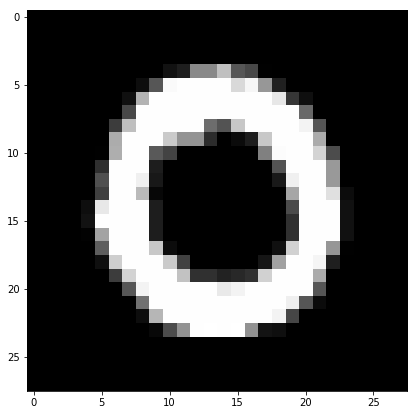

0


In [36]:
plt.figure(figsize=(7,7))
idx = 1
grid_data = d2.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation = "none",cmap = "gray")
plt.show()
print(l1[idx])

/home/ramchowdary/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


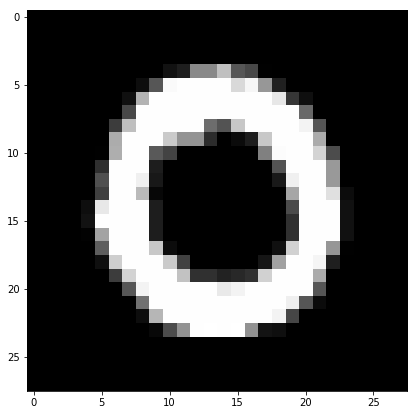

0


In [32]:
plt.figure(figsize=(7,7))
idx = 1

grid_data = d2.iloc[idx].as_matrix().reshape(28,28) # reshape from 1d to 2d pixel array.
plt.imshow(grid_data,interpolation = "none",cmap = 'gray')
plt.show()
print(l1[idx])

 # 2D Visualization using PCA

In [75]:
# pick first 15000 datapoints to work on for time-efficiency.
labels = l1.head()

In [76]:
data = d2.head(15000) # take 15k values and store in the variable = data.

In [77]:
print("the shape of simple data : ",data.shape)

the shape of simple data :  (15000, 784)


In [78]:
# Data - preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler

In [79]:
sd = StandardScaler().fit_transform(data) # to standardized data

In [80]:
sd.shape

(15000, 784)

In [81]:
# find the covariance matrix which is : A^T*A
sample = sd

In [82]:
# matrix multiplication using numpy
cov = np.matmul(sample.T , sample)

In [83]:
print("the shape of variance matrix : " ,cov.shape)

the shape of variance matrix :  (784, 784)


In [84]:
# finding the top2 eigen-values and corresponding eigen-vectors
# for projecting onto a 2-dimensional space.
from scipy.linalg import eigh

In [85]:
# the parameter 'eigvals' is defined(low value to high value)
# eigh function will return the eigen values in ascending order.
# this code generates only the top 2 eigen values (782 and 783)

In [86]:
values , vectors = eigh(cov,eigvals=(782,783))

In [87]:
print('shape of eigen vectors = ',vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations.

shape of eigen vectors =  (784, 2)


In [88]:
vectors

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [89]:
vectors = vectors.T

In [90]:
print("update shape of eigen vectors = " ,vectors.shape)

update shape of eigen vectors =  (2, 784)


In [91]:
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
# here the vectors[1] represent the eigen vector corresponding 1st principal eign vector.
# formed the vectors[0] represents the eigen vector corresponding 2nd principal

In [93]:
# projecting the original data sample on the plane
# formed by two principal eigen vectors by vector-vector multiplication.

In [94]:
new_coordinates = np.matmul(vectors,sample.T)

In [95]:
print('resultant new data points shape :',vectors.shape,'x',sample.T.shape," = ", new_coordinates.shape)

resultant new data points shape : (2, 784) x (784, 15000)  =  (2, 15000)


In [96]:
new_coordinates

array([[-5.5586608 ,  6.19363477, -1.90987794, ..., -2.14793723,
         3.20412249, -6.87896871],
       [-5.04355835, 19.30527806, -7.67877525, ..., -1.50726893,
        -6.53731291, -1.25625388]])

In [97]:
# appending label to the 2d projected data
new = np.vstack(())

ValueError: need at least one array to concatenate

In [98]:
new_coordinates = np.vstack((new_coordinates, labels)).T

ValueError: all the input array dimensions except for the concatenation axis must match exactly